In [4]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score
from scipy.stats import randint

In [5]:
file_path = '/Users/victoriavu25/btt_data/model_df_reviews.json'

df = pd.read_json(file_path)  
print(df.info()) 
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5900 entries, 0 to 5899
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      5900 non-null   object 
 1   NoiseLevel                       5900 non-null   int64  
 2   RestaurantsPriceRange2           5900 non-null   int64  
 3   district_encoded                 5900 non-null   int64  
 4   Parking_street_True              5900 non-null   int64  
 5   BikeParking_True                 5900 non-null   int64  
 6   OutdoorSeating_True              5900 non-null   int64  
 7   Caters_True                      5900 non-null   int64  
 8   BusinessAcceptsCreditCards_True  5900 non-null   int64  
 9   Ambience_classy_True             5900 non-null   int64  
 10  high_rating                      5900 non-null   int64  
 11  stars                            5900 non-null   float64
 12  service_positive         

,business_id,NoiseLevel,RestaurantsPriceRange2,district_encoded,Parking_street_True,BikeParking_True,OutdoorSeating_True,Caters_True,BusinessAcceptsCreditCards_True,Ambience_classy_True,...,food_negative,ambiance_positive,ambiance_negative,price_positive,price_negative,avg_stars,service_sentiment_ratio,food_sentiment_ratio,ambiance_sentiment_ratio,price_sentiment_ratio
0,MTSW4McQd7CbVtyjqoe9mw,1,1,0,1,1,0,1,0,0,...,14,4,3,24,2,4.057471,0.125000,1.022727,0.011364,0.250000
1,MUTTqe8uqyMdBl186RmNeA,1,2,0,1,0,1,0,1,1,...,36,36,22,22,37,4.200000,0.119522,1.314741,0.055777,-0.059761
2,ROeacJQwBeh05Rqg7F6TCg,0,1,0,1,1,0,1,1,0,...,30,32,17,32,17,4.317308,0.296651,0.894737,0.071770,0.071770
3,QdN72BWoyFypdGJhhI5r7g,1,2,0,1,1,0,0,1,0,...,9,5,15,2,7,3.884058,0.300000,0.700000,-0.142857,-0.071429
4,Mjboz24M9NlBeiOJKLEd_Q,1,1,5,0,1,1,0,1,0,...,13,0,1,3,0,2.804878,0.000000,0.047619,-0.023810,0.071429


In [6]:
# Checking for NaN values in the original dataframe `df`
df.isna().sum()


business_id                        0
NoiseLevel                         0
RestaurantsPriceRange2             0
district_encoded                   0
Parking_street_True                0
BikeParking_True                   0
OutdoorSeating_True                0
Caters_True                        0
BusinessAcceptsCreditCards_True    0
Ambience_classy_True               0
high_rating                        0
stars                              0
service_positive                   0
service_negative                   0
food_positive                      0
food_negative                      0
ambiance_positive                  0
ambiance_negative                  0
price_positive                     0
price_negative                     0
avg_stars                          0
service_sentiment_ratio            0
food_sentiment_ratio               0
ambiance_sentiment_ratio           0
price_sentiment_ratio              0
dtype: int64

In [7]:
df['is_rating_high'] = (df['stars'] >= 4).astype(int)
df

,business_id,NoiseLevel,RestaurantsPriceRange2,district_encoded,Parking_street_True,BikeParking_True,OutdoorSeating_True,Caters_True,BusinessAcceptsCreditCards_True,Ambience_classy_True,...,ambiance_positive,ambiance_negative,price_positive,price_negative,avg_stars,service_sentiment_ratio,food_sentiment_ratio,ambiance_sentiment_ratio,price_sentiment_ratio,is_rating_high
0,MTSW4McQd7CbVtyjqoe9mw,1,1,0,1,1,0,1,0,0,...,4,3,24,2,4.057471,0.125000,1.022727,0.011364,0.250000,1
1,MUTTqe8uqyMdBl186RmNeA,1,2,0,1,0,1,0,1,1,...,36,22,22,37,4.200000,0.119522,1.314741,0.055777,-0.059761,1
2,ROeacJQwBeh05Rqg7F6TCg,0,1,0,1,1,0,1,1,0,...,32,17,32,17,4.317308,0.296651,0.894737,0.071770,0.071770,1
3,QdN72BWoyFypdGJhhI5r7g,1,2,0,1,1,0,0,1,0,...,5,15,2,7,3.884058,0.300000,0.700000,-0.142857,-0.071429,1
4,Mjboz24M9NlBeiOJKLEd_Q,1,1,5,0,1,1,0,1,0,...,0,1,3,0,2.804878,0.000000,0.047619,-0.023810,0.071429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,VZbkSeZtFynEascotq7ExA,1,1,12,0,0,0,0,0,0,...,6,2,1,0,3.888889,0.100000,1.000000,0.400000,0.100000,1
5896,gPr1io7ks0Eo3FDsnDTYfg,0,1,15,0,1,1,0,1,0,...,5,2,2,0,4.045455,0.217391,0.434783,0.130435,0.086957,1
5897,wVxXRFf10zTTAs11nr4xeA,1,2,5,1,1,0,1,1,0,...,9,5,2,5,3.271186,0.133333,0.516667,0.066667,-0.050000,0
5898,8n93L-ilMAsvwUatarykSg,1,2,12,0,1,1,0,1,0,...,4,2,5,12,2.818182,0.086957,0.826087,0.086957,-0.304348,0


high_rating is 4 and above. after newly sorted data, the split is now 3200 low 2661 high.

In [9]:
df = df.drop(columns = ['stars', 'high_rating', 
    'OutdoorSeating_True', 'Caters_True', 'high_rating','stars'])

In [15]:
pd.set_option('display.max_columns', None) 
df.head()

,business_id,NoiseLevel,RestaurantsPriceRange2,district_encoded,Parking_street_True,BikeParking_True,BusinessAcceptsCreditCards_True,Ambience_classy_True,service_positive,service_negative,food_positive,food_negative,ambiance_positive,ambiance_negative,price_positive,price_negative,avg_stars,service_sentiment_ratio,food_sentiment_ratio,ambiance_sentiment_ratio,price_sentiment_ratio,is_rating_high
0,MTSW4McQd7CbVtyjqoe9mw,1,1,0,1,1,0,0,19,8,104,14,4,3,24,2,4.057471,0.125000,1.022727,0.011364,0.250000,1
1,MUTTqe8uqyMdBl186RmNeA,1,2,0,1,0,1,1,71,41,366,36,36,22,22,37,4.200000,0.119522,1.314741,0.055777,-0.059761,1
2,ROeacJQwBeh05Rqg7F6TCg,0,1,0,1,1,1,0,82,20,217,30,32,17,32,17,4.317308,0.296651,0.894737,0.071770,0.071770,1
3,QdN72BWoyFypdGJhhI5r7g,1,2,0,1,1,1,0,32,11,58,9,5,15,2,7,3.884058,0.300000,0.700000,-0.142857,-0.071429,1
4,Mjboz24M9NlBeiOJKLEd_Q,1,1,5,0,1,1,0,8,8,15,13,0,1,3,0,2.804878,0.000000,0.047619,-0.023810,0.071429,0


In [17]:
import pandas as pd

# Assuming df is already loaded and contains the specified columns
columns_of_interest = [
    'service_positive', 'service_negative',
       'food_positive', 'food_negative', 'ambiance_positive',
       'ambiance_negative', 'price_positive', 'price_negative',
       'service_sentiment_ratio', 'food_sentiment_ratio',
       'ambiance_sentiment_ratio', 'price_sentiment_ratio', 'is_rating_high'
]

# Calculate correlations with 'is_rating_high'
correlations = df[columns_of_interest].corr()['is_rating_high'].drop('is_rating_high')

# Display the correlations
correlations_sorted = correlations.sort_values(ascending=False)
correlations_sorted


food_sentiment_ratio        0.427506
service_sentiment_ratio     0.318710
food_positive               0.230175
service_positive            0.208502
ambiance_sentiment_ratio    0.205533
ambiance_positive           0.194702
price_positive              0.146944
food_negative               0.107678
ambiance_negative           0.091863
price_sentiment_ratio       0.091596
price_negative              0.091182
service_negative            0.060389
Name: is_rating_high, dtype: float64

In [19]:
columns_to_drop = [
    'service_positive', 'service_negative',
     'food_negative', 'ambiance_positive',
       'ambiance_negative', 'price_positive', 'price_negative',
     'price_sentiment_ratio', 'avg_stars'
]
df = df.drop(columns = columns_to_drop)
df

,business_id,NoiseLevel,RestaurantsPriceRange2,district_encoded,Parking_street_True,BikeParking_True,BusinessAcceptsCreditCards_True,Ambience_classy_True,food_positive,service_sentiment_ratio,food_sentiment_ratio,ambiance_sentiment_ratio,is_rating_high
0,MTSW4McQd7CbVtyjqoe9mw,1,1,0,1,1,0,0,104,0.125000,1.022727,0.011364,1
1,MUTTqe8uqyMdBl186RmNeA,1,2,0,1,0,1,1,366,0.119522,1.314741,0.055777,1
2,ROeacJQwBeh05Rqg7F6TCg,0,1,0,1,1,1,0,217,0.296651,0.894737,0.071770,1
3,QdN72BWoyFypdGJhhI5r7g,1,2,0,1,1,1,0,58,0.300000,0.700000,-0.142857,1
4,Mjboz24M9NlBeiOJKLEd_Q,1,1,5,0,1,1,0,15,0.000000,0.047619,-0.023810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,VZbkSeZtFynEascotq7ExA,1,1,12,0,0,0,0,11,0.100000,1.000000,0.400000,1
5896,gPr1io7ks0Eo3FDsnDTYfg,0,1,15,0,1,1,0,12,0.217391,0.434783,0.130435,1
5897,wVxXRFf10zTTAs11nr4xeA,1,2,5,1,1,1,0,45,0.133333,0.516667,0.066667,0
5898,8n93L-ilMAsvwUatarykSg,1,2,12,0,1,1,0,21,0.086957,0.826087,0.086957,0


In [21]:
X = df.drop(columns = ["business_id", 'is_rating_high'])
y = df["is_rating_high"]

In [23]:
# Assuming y_train contains the star ratings
star_counts = y.value_counts()
print(star_counts)


is_rating_high
0    3239
1    2661
Name: count, dtype: int64


In [25]:
print(X.shape)

(5900, 11)


In [84]:
X.columns

Index(['NoiseLevel', 'RestaurantsPriceRange2', 'district_encoded',
       'Parking_street_True', 'BikeParking_True',
       'BusinessAcceptsCreditCards_True', 'Ambience_classy_True',
       'food_positive', 'service_sentiment_ratio', 'food_sentiment_ratio',
       'ambiance_sentiment_ratio'],
      dtype='object')

In [27]:
print(y.shape)

(5900,)


# train test split

In [30]:
#split 20% into test, 80% into x and y 
x, X_test, Y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(x.shape)
print(X_test.shape)
print(Y.shape)
print(y_test.shape)

(4720, 11)
(1180, 11)
(4720,)
(1180,)


In [34]:
#further split training data into val 20% of total data and training with 60% of total data
X_train, X_val, y_train, y_val = train_test_split(x, Y, test_size=0.25, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(3540, 11)
(1180, 11)
(1180, 11)
(3540,)
(1180,)
(1180,)


# Creating and fitting models

In [39]:
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'
rf = RandomForestClassifier(criterion='entropy')

# 2. Fit the model to the training data below
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [41]:
# 3. Make predictions on the test data using the predict_proba() method and assign the 
rf_proba = list(rf.predict_proba(X_val)[:, -1])
rf_pred = rf.predict(X_val)

# Evaluations

In [44]:
rf_accuracy = accuracy_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)

Accuracy: 0.7491525423728813
Precision: 0.7457264957264957
Recall: 0.6634980988593155


In [46]:
# Convert probabilities to class predictions (threshold 0.5)
rf_recall = (rf.predict_proba(X_val)[:, 1] >= 0.5).astype(int)

# Compute and print model's accuracy score
acc_score = accuracy_score(y_val, rf_recall)
print('Accuracy score: {0}\n'.format(acc_score))

# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_val, rf_recall)

# Create a Pandas DataFrame out of the confusion matrix for display purposes
conf_matrix_df = pd.DataFrame(
    c_m,
    columns=['Predicted: Star Rating is Bad', 'Predicted: Star Rating is Good'],
    index=['Actual: Star Rating is Bad', 'Actual: Star Rating is Good']
)
conf_matrix_df


Accuracy score: 0.7483050847457627

Confusion Matrix for the model: 


,Predicted: Star Rating is Bad,Predicted: Star Rating is Good
Actual: Star Rating is Bad,528,126
Actual: Star Rating is Good,171,355


In [48]:
print('Computing ROC Curve...')

# Use roc_curve to record fpr and tpr for rf_20_model
fpr, tpr, thresholds = roc_curve(y_val, rf_proba)
print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


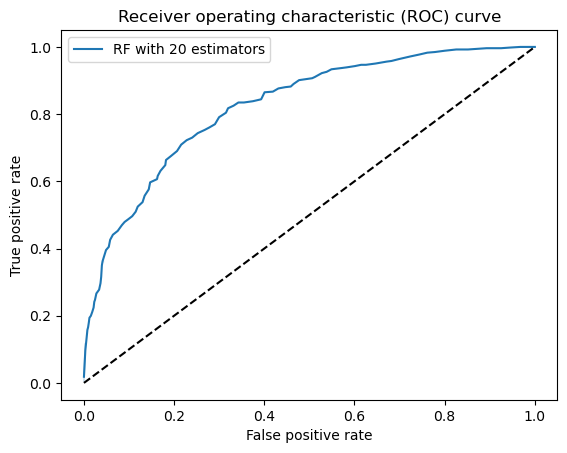

In [50]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr, y=tpr)

#comparison
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators'])
plt.show()


# Hyperparameter Tuning

In [53]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50,100, 200],             
    'max_depth': [5, 10, 20],            
    'min_samples_split': [2, 5, 10, 20],    
    'min_samples_leaf': [2, 4, 10]
}

# Perform a grid search with precision as the scoring metric
grid_search = GridSearchCV(rf, param_grid, scoring='precision', cv=5,verbose =1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=1)

In [54]:
best_rf_precision = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [59]:
tuned_rf_model = RandomForestClassifier(
    max_depth= 10,
    min_samples_split=10,
    n_estimators= 100,
    min_samples_leaf = 4,
    random_state=42
)
tuned_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [61]:
tunedrf_proba = tuned_rf_model.predict_proba(X_val)[:, -1]
tunedrf_pred = tuned_rf_model.predict(X_val)

In [63]:
tunedrf_accuracy = accuracy_score(y_val, tunedrf_pred)
tunedrf_precision = precision_score(y_val, tunedrf_pred)
tunedrf_recall = recall_score(y_val, tunedrf_pred)

print("Accuracy:", tunedrf_accuracy)
print("Precision:", tunedrf_precision)
print("Recall:", tunedrf_recall)

Accuracy: 0.752542372881356
Precision: 0.7407407407407407
Recall: 0.6844106463878327


In [65]:
# Compute and print model's accuracy score
acc_score = accuracy_score(y_val, tunedrf_pred)
print('Accuracy score: {0}\n'.format(acc_score))

# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_val, tunedrf_pred)

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Star Rating is Bad', 'Predicted: Star Rating is Good'],
index=['Actual: Star Rating is Bad', 'Actual: Star Rating is Good']
)

Accuracy score: 0.752542372881356

Confusion Matrix for the model: 


,Predicted: Star Rating is Bad,Predicted: Star Rating is Good
Actual: Star Rating is Bad,528,126
Actual: Star Rating is Good,166,360


In [67]:
# Compute and print model's accuracy score
acc_score = accuracy_score(y_val, tunedrf_pred)
print('Accuracy score: {0}\n'.format(acc_score))

# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_val, tunedrf_pred)

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Star Rating is Bad', 'Predicted: Star Rating is Good'],
index=['Actual: Star Rating is Bad', 'Actual: Star Rating is Good']
)

Accuracy score: 0.752542372881356

Confusion Matrix for the model: 


,Predicted: Star Rating is Bad,Predicted: Star Rating is Good
Actual: Star Rating is Bad,528,126
Actual: Star Rating is Good,166,360


# final model

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(
    max_depth= 10,
    min_samples_split=10,
    n_estimators= 100,
    min_samples_leaf = 4,
    random_state=42
)

# Train the model
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [74]:
best_rf_proba = best_rf.predict_proba(X_test)[:, -1]

best_rf_pred = best_rf.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, best_rf_pred)
precision = precision_score(y_test, best_rf_pred)
recall = recall_score(y_test, best_rf_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7542372881355932
Precision: 0.7435424354243543
Recall: 0.7274368231046932


In [78]:
# Compute and print model's accuracy score
acc_score = accuracy_score(y_test, best_rf_pred)
print('Accuracy score: {0}\n'.format(acc_score))

# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_test, best_rf_pred)

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Star Rating is Bad', 'Predicted: Star Rating is Good'],
index=['Actual: Star Rating is Bad', 'Actual: Star Rating is Good']
)

Accuracy score: 0.7542372881355932

Confusion Matrix for the model: 


,Predicted: Star Rating is Bad,Predicted: Star Rating is Good
Actual: Star Rating is Bad,487,139
Actual: Star Rating is Good,151,403


In [80]:
fpr, tpr, _ = roc_curve(y_test, best_rf_proba)

Plotting ROC Curve...


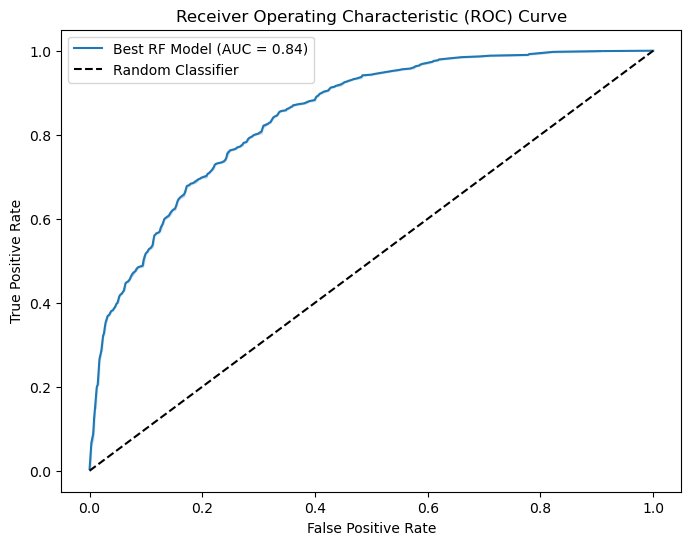

In [82]:
print('Plotting ROC Curve...')
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label="Best RF Model (AUC = {:.2f})".format(roc_auc_score(y_test, best_rf_proba)))

# Add diagonal comparison line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add titles and labels
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()